<div class="alert alert-block alert-info">
    <center><font size = 6><b>Association Rule Mining</b></div>

Association rule mining is a procedure which is meant to find frequent patterns, correlations, associations, or causal structures from data sets found in various kinds of databases such as relational databases, transactional databases, and other forms of data repositories.

Given a set of transactions, association rule mining aims to find the rules which enable us to predict the occurrence of a specific item based on the occurrences of the other items in the transaction.



<div class="alert alert-block alert-warning">
 We look for association rules such as: A = LHS (buy chips) → B = RHS (buy
    beer). The left-hand side is referred to as <b>“antecedent”</b>; the right-hand side is
    referred to as <b>“consequent”</b>; and the arrow expresses <b>“is related to.”</b>
</div>

## Market Basket Analysis : Online Radio

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data

For illustration, we use a large data set with close to 300,000 records of song (artist) selections made by 15,000 users on an online radio. Each row of our data set contains the name of the artist the user has listened to.


#### [Download Data](https://www.biz.uiowa.edu/faculty/jledolter/DataMining/lastfm.csv)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from apyori import apriori

In [2]:
# Loading Data
data = pd.read_csv('lastfm.csv')

# Top 10 rows
data.head(10)

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
5,1,schandmaul,f,Germany
6,1,edguy,f,Germany
7,1,jack johnson,f,Germany
8,1,eluveitie,f,Germany
9,1,the killers,f,Germany


In [3]:
# Remove Duplicate Rows (artist mentioned by a user twice)
data = data.drop_duplicates()

In [4]:
# We will use 'user' and 'artist' columns to mine association rules
playlist = data.iloc[:,0:2]

## Data Processing

<div class="alert alert-block alert-warning">
The Apyori library we are going to use requires each transaction in our data in the form of lists. 
</div>

In [5]:
# Transforming each user transactions to list
transactions = playlist.groupby(['user']).aggregate(lambda x: list(x)).reset_index()
transactions.head()

,user,artist
0,1,"[red hot chili peppers, the black dahlia murde..."
1,3,"[devendra banhart, boards of canada, cocorosie..."
2,4,"[tv on the radio, tool, kyuss, dj shadow, air,..."
3,5,"[dream theater, ac/dc, metallica, iron maiden,..."
4,6,"[lily allen, kanye west, sigur rós, pink floyd..."


## Apriori Algorithm

The **`Apriori`** algorithm calculates below rules that express probabilistic relationships between items in frequent itemsets.

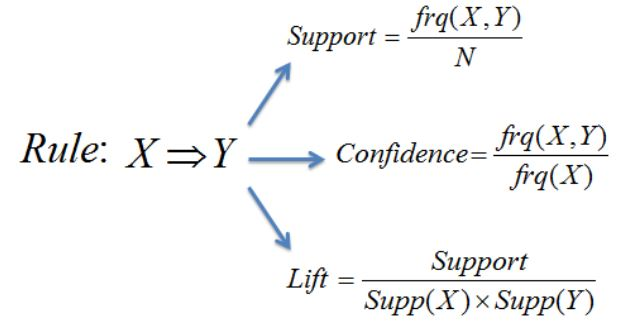

In [6]:
# We look for artists who have support larger than 1% and who give confidence to another artist that is larger than 50%.
association_rules = apriori(transactions.artist,min_support = 0.01,min_confidence =0.5)

# Convering output to list
association_results = list(association_rules)

In [7]:
# Creating Music Rules Dataframe

music_rules = pd.DataFrame(columns=('Antecedent','Consequent','Support','Confidence','Lift'))

support =[]
confidence = []
lift = []
antecedent = []
consequent=[]

for record in association_results:
    for ordered_stat in record.ordered_statistics:
        support.append(record.support)
        antecedent.append(ordered_stat.items_base)
        consequent.append(ordered_stat.items_add)
        confidence.append(ordered_stat.confidence)
        lift.append(ordered_stat.lift)
                           
music_rules['Antecedent'] = antecedent
music_rules['Consequent'] = consequent
music_rules['Support'] = support
music_rules['Confidence'] = confidence
music_rules['Lift']= lift

In [8]:
# Rules with Lift > 5 and order by Confidence
music_rules[music_rules.Lift > 5].sort_values(by = 'Confidence', ascending = False)

,Antecedent,Consequent,Support,Confidence,Lift
38,"(led zeppelin, the doors)",(pink floyd),0.010667,0.597015,5.689469
12,(the pussycat dolls),(rihanna),0.010400,0.577778,13.415893
8,(t.i.),(kanye west),0.010400,0.567273,8.854413
39,"(pink floyd, the doors)",(led zeppelin),0.010667,0.538721,6.802027
10,(sonata arctica),(nightwish),0.013467,0.510101,8.236292
7,(judas priest),(iron maiden),0.013533,0.507500,8.562992


<div class="alert alert-block alert-warning">
<ul><li>Listening to both “Led Zeppelin” and “The Doors” is quite predictive of listening to “PinkFloyd” (Confidence ~ 60%) </li>
    <li>Listening to 'The Pussycat Dolls' lifts the chance of listening to 'Rihanna' by factor of 13.</li>
    <li>Users can be recommended artists based on above rules</li>
</div>

## Rules by Gender

### Male

In [9]:
# Music listened by Males
male_playlist = data.loc[data.sex == 'm',['user','artist']]

# Transforming transactions to list
male_transactions = male_playlist.groupby(['user']).aggregate(lambda x: list(x.unique())).reset_index()

# Association rules for male users
male_association_rules = apriori(male_transactions.artist,min_support = 0.01,min_confidence =0.5)
male_association_results = list(male_association_rules)

In [10]:
# Creating Male Music Rules Dataframe
male_music_rules = pd.DataFrame(columns=('Antecedent','Consequent','Support','Confidence','Lift'))

support =[]
confidence = []
lift = []
antecedent = []
consequent=[]

for record in male_association_results:
    for ordered_stat in record.ordered_statistics:
        support.append(record.support)
        antecedent.append(ordered_stat.items_base)
        consequent.append(ordered_stat.items_add)
        confidence.append(ordered_stat.confidence)
        lift.append(ordered_stat.lift)
                           
male_music_rules['Antecedent'] = antecedent
male_music_rules['Consequent'] = consequent
male_music_rules['Support'] = support
male_music_rules['Confidence'] = confidence
male_music_rules['Lift']= lift

In [11]:
# Rules with Lift > 5 and order by Confidence
male_music_rules[male_music_rules.Lift > 5].sort_values(by = 'Confidence', ascending = False)

,Antecedent,Consequent,Support,Confidence,Lift
41,"(megadeth, iron maiden)",(metallica),0.010584,0.686047,5.371301
46,"(koЯn, slipknot)",(system of a down),0.011122,0.599034,6.115960
49,"(led zeppelin, the doors)",(pink floyd),0.011660,0.588235,5.155845
44,"(jimi hendrix, the beatles)",(led zeppelin),0.010853,0.587379,6.800295
14,(t.i.),(kanye west),0.011571,0.575893,9.005090
13,(lupe fiasco),(kanye west),0.010674,0.548387,8.574990
50,"(pink floyd, the doors)",(led zeppelin),0.011660,0.546218,6.323769
47,"(slipknot, system of a down)",(koЯn),0.011122,0.543860,10.139617
42,"(megadeth, metallica)",(iron maiden),0.010584,0.533937,7.563989
8,(soilwork),(in flames),0.010584,0.529148,9.261336


### Female

In [12]:
# Music listened by Females
female_playlist = data.loc[data.sex == 'f',['user','artist']]

# Transforming transactions to list
female_transactions = female_playlist.groupby(['user']).aggregate(lambda x: list(x.unique())).reset_index()

# Association rules for male users
female_association_rules = apriori(female_transactions.artist,min_support = 0.01,min_confidence =0.5)
female_association_results = list(female_association_rules)

In [13]:
# Creating Female Music Rules Dataframe
female_music_rules = pd.DataFrame(columns=('Antecedent','Consequent','Support','Confidence','Lift'))

support =[]
confidence = []
lift = []
antecedent = []
consequent=[]

for record in female_association_results:
    for ordered_stat in record.ordered_statistics:
        support.append(record.support)
        antecedent.append(ordered_stat.items_base)
        consequent.append(ordered_stat.items_add)
        confidence.append(ordered_stat.confidence)
        lift.append(ordered_stat.lift)
                           
female_music_rules['Antecedent'] = antecedent
female_music_rules['Consequent'] = consequent
female_music_rules['Support'] = support
female_music_rules['Confidence'] = confidence
female_music_rules['Lift']= lift

In [14]:
# Rules with Lift > 5 and order by Confidence
female_music_rules[female_music_rules.Lift > 5].sort_values(by = 'Confidence', ascending = False)

,Antecedent,Consequent,Support,Confidence,Lift
80,"(sufjan stevens, bright eyes)",(death cab for cutie),0.012984,0.757576,6.027736
188,"(panic at the disco, my chemical romance)",(fall out boy),0.011166,0.704918,8.563531
229,"(sufjan stevens, the decemberists)",(the shins),0.011166,0.671875,8.624635
97,"(coldplay, sufjan stevens)",(death cab for cutie),0.012464,0.666667,5.304408
86,"(rihanna, lady gaga)",(britney spears),0.012464,0.666667,7.398655
82,"(the shins, bright eyes)",(death cab for cutie),0.012205,0.661972,5.267053
182,"(the shins, the decemberists)",(death cab for cutie),0.011945,0.657143,5.228630
176,"(sufjan stevens, the decemberists)",(death cab for cutie),0.010906,0.656250,5.221526
94,"(modest mouse, coldplay)",(death cab for cutie),0.012724,0.636364,5.063298
101,"(the postal service, coldplay)",(death cab for cutie),0.013243,0.629630,5.009718


<div class="alert alert-block alert-warning">
<ul><li>The association rules are different for males and females</li>
    <li>The online radio channel should recommend music based on the gender of user.</li>
</div>